# Brown Univ. Introduction to Bioconductor 2018, Period 1

## A comment on how to use the notebook

It is probably best to "clear" all cells at first.  We will go through text, look
at the code blocks, think about what they mean, and then execute them.  Use the "Cell"
tab and select "All Output", then click on the "Clear" option that will appear.

## Road map

- Overview of Bioconductor project and statement of some core values
- Installation and documentation briefly reviewed
- Coordinating information from multiple files in ExpressionSets
- Using GEOquery to obtain annotated expression data from NCBI GEO

Specifically we will work with data from a [Cancer Cell](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5479636/) paper that
"show[s] that LXR-623, a clinically viable, highly brain-penetrant LXRα-partial/LXRβ-full agonist selectively kills GBM cells in an LXRβ- and cholesterol-dependent fashion, causing tumor regression and prolonged survival in mouse models."

## Motivations and core values

In [1]:
# a quick setup to avoid extraneous messages
suppressPackageStartupMessages({
    library(Homo.sapiens)
    library(GEOquery)
    library(GSE5859Subset)
    library(Biobase)
    library(pasilla) # or make sure it is installed
})

### Why R?

Bioconductor is based on R. Three key reasons for this are:

- R is used by many statisticians and biostatisticians to create algorithms that advance our ability to understand complex experimental data.

- R is highly interoperable, and fosters reuse of software components written in other languages.

- R is portable to the key operating systems running on commodity computing equipment (Linux, MacOSX, Windows) and can be used immediately by beginners with access to any of these platforms.

Other languages are starting to share these features.  However the large software ecosystems of R and Bioconductor will continue to play a role even as new languages and environments for genome-scale analysis start to take shape.

### What is R?

We'll see more clearly what R is as we work with it.  Two features that merit attention are its approach to *functional* and *object-oriented* programming.

Before we get into these programming concepts, let's get clear on the approach we are taking to working with R.

- We are using R *interactively* in the Jupyter notebook system for scientific computing
- Our interaction with R is defined in notebook "cells"
- We can put some code in a cell and ask the notebook server to execute the code
- If there's an error or we want to modify the cell for some reason, we just change the content of the cell and request a new execution

#### Defining and using functions

The next two cells introduce a simple R function and then pose some questions that you can answer by modifying the second cell.

In [2]:
# functional programming example
cube = function(x) x^3
cube(4)

[1] 64

#### Exercises

Ex1. What is the cube of 7?  Use the `cube` function

In [3]:
cube(7)

[1] 343

Ex2. Given the cube function, what is a concise way of defining a function that computes 
the ninth power of its argument, without invoking the exponential directly?

In [4]:
nin = function(x) cube(cube(x))
    nin(4)
    4^9

[1] 262144

[1] 262144

To review: 
- `g = function(x, y, ...) { --- }` is R syntax to define a new function named "g" accepting a series of arguments.  
- The body of the function (denoted `{ --- }`) uses the inputs and R programming to compute new values.
- All program actions in R result from evaluating functions.


### What is Bioconductor?

While Bioconductor is built on R, a number of distinctions are worthy of attention:

| R                                                                                                                                               | Bioconductor                                                                                                                |
|-------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| a general-purpose programming for statistical computing and visualization                                                                       | R data structures, methods, and packages for Bioinformatics                                                                                                   |
| a decentralized open-source project                                                                                                             | led by a Core Team of full-time developers                                                                                  |
| provides methods primarily acting on generic data structures like `numeric`, `matrix`, `data.frame`, and "tidyverse" alternatives like `tibble` | provides methods primarily acting on integrative data structures for -omics like `GRanges` and `SummarizedExperiment`       |
| is enhanced by the CRAN,ecosystem of >10K add-packages spanning all areas of science,,economics, computing, etc                                 | an ecosystem of >1,200 add-on packages                                                         |
| CRAN enforces basic package requirements of man pages,and clean machine checks                                                                  | Bioconductor enforces additional package requirements of vignettes, re-use of core Bioconductor data structures, unit tests |
| Wikipedia describes aspects of <a href="https://en.wikipedia.org/wiki/R_(programming_language)#Commercial_support_for_R">commercially supported versions of R</a> | Bioconductor development is supported by several [NIH and EC](http://bioconductor.org/about/annual-reports/AnnRep2017.pdf) grants

#### Working with objects

Genome-scale experiments and annotations are complex.  The discipline of object-oriented programming became
popular in the 1990s as a way of managing program complexity.  Briefly, we think of a class of objects -- say 'organism'.  Methods that apply to directly to instances of the 'organism' class include 'genes', 'transcripts', 'promoters'.  

This concept is implemented fairly directly in Bioconductor, but there are gaps in certain places.  Let's
just explore to establish a little familiarity.  We'll attach the Homo.sapiens library, which gives us access to an 
object called `Homo.sapiens`, which answers to a certain collection of methods.

 



In [5]:
library(Homo.sapiens)
methods(class=class(Homo.sapiens))

 [1] asBED                 asGFF                 cds                  
 [4] cdsBy                 coerce<-              columns              
 [7] dbconn                dbfile                disjointExons        
[10] distance              exons                 exonsBy              
[13] extractUpstreamSeqs   fiveUTRsByTranscript  genes                
[16] getTxDbIfAvailable    intronsByTranscript   isActiveSeq          
[19] isActiveSeq<-         keys                  keytypes             
[22] mapIds                mapToTranscripts      metadata             
[25] microRNAs             promoters             resources            
[28] select                selectByRanges        selectRangesById     
[31] seqinfo               show                  taxonomyId           
[34] threeUTRsByTranscript transcripts           transcriptsBy        
[37] tRNAs                 TxDb                  TxDb<-               
see '?methods' for accessing help and source code

In [6]:
genes(Homo.sapiens) # we'll look at this data structure in great detail later

GRanges object with 23056 ranges and 1 metadata column:
        seqnames                 ranges strand |       GENEID
           <Rle>              <IRanges>  <Rle> | <FactorList>
      1    chr19 [ 58858172,  58874214]      - |            1
     10     chr8 [ 18248755,  18258723]      + |           10
    100    chr20 [ 43248163,  43280376]      - |          100
   1000    chr18 [ 25530930,  25757445]      - |         1000
  10000     chr1 [243651535, 244006886]      - |        10000
    ...      ...                    ...    ... .          ...
   9991     chr9 [114979995, 115095944]      - |         9991
   9992    chr21 [ 35736323,  35743440]      + |         9992
   9993    chr22 [ 19023795,  19109967]      - |         9993
   9994     chr6 [ 90539619,  90584155]      + |         9994
   9997    chr22 [ 50961997,  50964905]      - |         9997
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

One benefit of the object-oriented discipline is that the same methods apply for different species -- once 
you have learned how to work with Homo.sapiens, the same tools apply for Mus.musculus, Rattus.norvegicus and 
so on.

### Upshots

We've seen three important facets of the language/ecosystem

- improvised software creation through __user-defined functions__
- high-level concepts can be expressed as __methods__ applicable to __objects__ (instances of formally defined classes)
- acquisition of complex, biologically meaningful 'objects' and 'methods' with __library()__

__Use of library()__ is essential to acquire access to functions and documentation on library components.  This can be a stumbling block if you remember the name of a function of interest, but not the package in which it is defined.
    
Another feature worth bearing in mind: all computations in R proceed by __evaluation of functions__.  You may write scripts, but they will be sequences of function calls.  One prominent developer (D. Eddelbuettel) has [written](https://stat.ethz.ch/pipermail/r-devel/2018-January/075465.html) that "Anything you do more than three times should be a
function, and every function should be in a package".  Thus full appreciation of
R's potentials in scientific computing will ultimately involve understanding of
function design and package creation and maintenance.

Thus there are many ways of using software in R.  

- write scripts and execute them at a command line using Rscript or unix-like pipes.
- use a bespoke interactive development environment like Rstudio
- use R as a command-line interpreter
- use jupyter notebooks
- use R through online "apps", often composed using the shiny package.
    
We'll explore some of these alternate approaches as we proceed.

## Putting it all together

Bioconductor’s core developer group works hard to develop data structures that allow users to work conveniently with genomes and genome-scale data. Structures are devised to support the main phases of experimentation in genome scale biology:

- Parse large-scale assay data as produced by microarray or sequencer flow-cell scanners.
- Preprocess the (relatively) raw data to support reliable statistical interpretation.
- Combine assay quantifications with sample-level data to test hypotheses about relationships between molecular processes and organism-level characteristics such as growth, disease state.
- In this course we will review the objects and functions that you can use to perform these and related tasks in your own research.

## Bioconductor installation and documentation

### Installation support

Once you have R you can obtain a utility for adding Bioconductor packages with

```
source("http://www.bioconductor.org/biocLite.R")
```

This is sensitive to the version of R that you are using.  It installs and loads the BiocInstaller
package.  Let's illustrate its use.

In [7]:
library(BiocInstaller)
biocLite("genomicsclass/GSE5859Subset", suppressUpdates=TRUE, suppressAutoUpdate=TRUE)  # this will be used later

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing github package(s) ‘genomicsclass/GSE5859Subset’
Skipping install of 'GSE5859Subset' from a github remote, the SHA1 (8ada5f4f) has not changed since last install.
  Use `force = TRUE` to force installation


### Documentation

For novices, large-scale help resources are always important.  

- Bioconductor's __[main portal](http://www.bioconductor.org)__ has sections devoted to installation, learning, using, and developing.  There is a twitter feed for those who need to keep close by.
- The __[support site](http://support.bioconductor.org)__ is active and friendly
- R has extensive help resources at __[CRAN](http://cran.r-project.org)__ and within any instance 

In [8]:
# help.start() -- may not work with notebooks but very useful in Rstudio or at command line

Documentation on any base or Bioconductor function can be found using the ?-operator 

In [9]:
?mean # use ?? to find documentation on functions in all installed packages

All good manual pages include executable examples


lm> require(graphics)

lm> ## Annette Dobson (1990) "An Introduction to Generalized Linear Models".
lm> ## Page 9: Plant Weight Data.
lm> ctl <- c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)

lm> trt <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)

lm> group <- gl(2, 10, 20, labels = c("Ctl","Trt"))

lm> weight <- c(ctl, trt)

lm> lm.D9 <- lm(weight ~ group)

lm> lm.D90 <- lm(weight ~ group - 1) # omitting intercept

lm> ## No test: 
lm> ##D anova(lm.D9)
lm> ##D summary(lm.D90)
lm> ## End(No test)
lm> opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))

lm> plot(lm.D9, las = 1)      # Residuals, Fitted, ...

lm> par(opar)

lm> ## Don't show: 
lm> ## model frame :
lm> stopifnot(identical(lm(weight ~ group, method = "model.frame"),
lm+                     model.frame(lm.D9)))

lm> ## End(Don't show)
lm> ### less simple examples in "See Also" above
lm> 
lm> 
lm> 


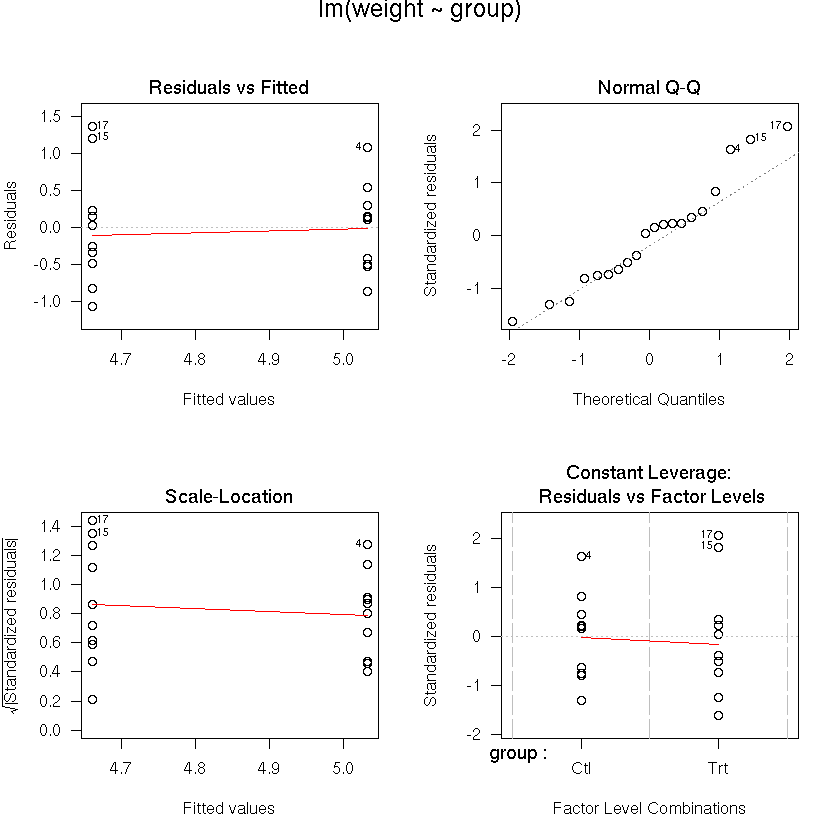

In [10]:
example(lm)

We can get 'package level' help -- a concise description and list of documented functions.

In [11]:
help(package="genefilter", help_type="html") # generates embedded view of DESCRIPTION and function index

Large-scale documentation that narrates and illustrates package (as opposed to function) capabilities is provided in vignettes.

In [12]:
# vignette() # This will generate an HTML page in notebook

In [13]:
# vignette("create_objects", package="pasilla") # this will start the browser to a vignette document

In summary: documentation for Bioconductor and R utilities is diverse but discovery is supported in many ways.  RTFM.

## Data structure and management for genome-scale experiments

Data management is often regarded as a specialized and tedious dimension of scientific research. 

- Because failures of data management are extremely costly in terms of resources and reputation, highly reliable and efficient methods are essential. 
- Customary lab science practice of maintaining data in spreadsheets is regarded as risky. We want to add value to data by making it easier to follow reliable data management practices.

In Bioconductor, principles that guide software development are applied in data management strategy. 

- High value accrues to data structures that are modular and extensible. 
- Packaging and version control protocols apply to data class definitions. 
- We will motivate and illustrate these ideas by 
    - giving examples of transforming spreadsheets to semantically rich objects, 
    - working with the NCBI GEO archive, 
    - dealing with families of BAM and BED files, and (optionally)
    - using external storage to foster coherent interfaces to large multiomic archives like TCGA.

### Coordinating information from multiple tables

With the GSE5859Subset package, we illustrate a "natural" approach to collecting microarray data and its annotation.

In [14]:
library(GSE5859Subset)
data(GSE5859Subset) # will 'create' geneExpression, sampleInfo, geneAnnotation
ls()

[1] "ctl"            "cube"           "geneAnnotation" "geneExpression"
 [5] "group"          "lm.D9"          "lm.D90"         "nin"           
 [9] "opar"           "sampleInfo"     "trt"            "weight"

In [15]:
dim(geneExpression)

[1] 8793   24

In [16]:
head(geneExpression[,1:5])

,GSM136508.CEL.gz,GSM136530.CEL.gz,GSM136517.CEL.gz,GSM136576.CEL.gz,GSM136566.CEL.gz
1007_s_at,6.543954,6.401470,6.298943,6.837899,6.470689
1053_at,7.546708,7.263547,7.201699,7.052761,6.980207
117_at,5.402622,5.050546,5.024917,5.304313,5.214149
121_at,7.892544,7.707754,7.461886,7.558130,7.819013
1255_g_at,3.242779,3.222804,3.185605,3.195363,3.251915
1294_at,7.531754,7.090270,7.466018,7.122145,7.058973


In [17]:
head(sampleInfo)

,ethnicity,date,filename,group
107,ASN,2005-06-23,GSM136508.CEL.gz,1
122,ASN,2005-06-27,GSM136530.CEL.gz,1
113,ASN,2005-06-27,GSM136517.CEL.gz,1
163,ASN,2005-10-28,GSM136576.CEL.gz,1
153,ASN,2005-10-07,GSM136566.CEL.gz,1
161,ASN,2005-10-07,GSM136574.CEL.gz,1


In [18]:
head(geneAnnotation)

,PROBEID,CHR,CHRLOC,SYMBOL
1,1007_s_at,chr6,30852327,DDR1
30,1053_at,chr7,-73645832,RFC2
31,117_at,chr1,161494036,HSPA6
32,121_at,chr2,-113973574,PAX8
33,1255_g_at,chr6,42123144,GUCA1A
34,1294_at,chr3,-49842638,UBA7


Here we have three objects in R that are conceptually linked.  We notice that `sampleInfo` has an ethnicity token and that the column names for the `geneExpression` table are similar in format to the `filename` field of `sampleInfo`.  Let's check that they in fact agree:

In [19]:
all(sampleInfo$filename == colnames(geneExpression))

[1] TRUE

The class of `sampleInfo` is `data.frame`.  We can refer to columns using the `$` operator.  Thus we can tabulate the
`group` field (which corresponds to gender):

In [20]:
table(sampleInfo$group)


 0  1 
12 12 

#### Exercises

Ex4. Tabulate the ethnicity for samples in this dataset

Ex5. We can compare distributions of expression of gene PAX8 by group as follows:

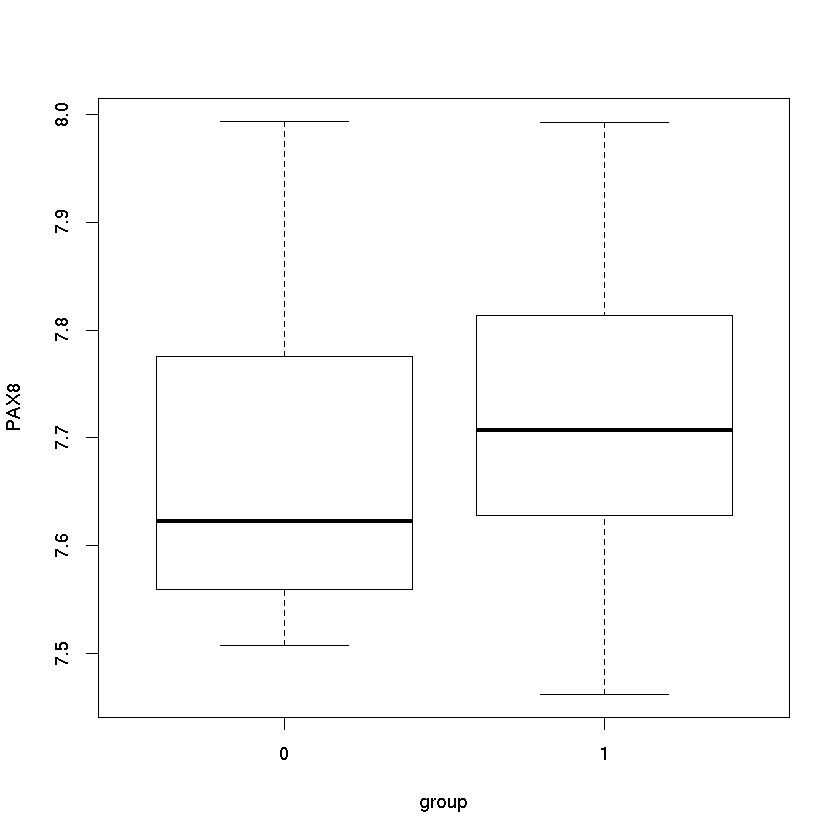

In [21]:
boxplot(split(geneExpression[which(geneAnnotation$SYMBOL=="PAX8"),], sampleInfo$group), ylab="PAX8", xlab="group")

Produce the same type of visual comparison for gene DDR1.

####  Unifying the tables with ExpressionSet in the Biobase package

We can simplify interactions with gene expression experiments by using an object to unify the different
information sources.  The following schematic helps to understand the objective.  For $N$ samples, a $G \times N$
table records gene expression values.  An $N \times R$ table records the sample information.  The ExpressionSet object `X` is
designed so that `X[i, j]` manages genes enumerated with `i` and samples enumerated with `j`.

<img src="https://raw.githubusercontent.com/vjcitn/BrownCOBRE2018/master/notebooks/esetFreeH.png" height="380" width="380"></img>

The ExpressionSet class is routinely used for microarray studies.  To begin, we will enhance
the annotation of the metadata components

In [22]:
rownames(sampleInfo) = sampleInfo$filename
rownames(geneAnnotation) = geneAnnotation$PROBEID

Now we build up the unified instance

In [23]:
library(Biobase)  # provides the class definition
es5859 = ExpressionSet(assayData=geneExpression)  # start the unification
pData(es5859) = sampleInfo  # add sample-level data
fData(es5859) = geneAnnotation  # add gene level data
es5859  # get a report

ExpressionSet (storageMode: lockedEnvironment)
assayData: 8793 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM136508.CEL.gz GSM136530.CEL.gz ... GSM136572.CEL.gz
    (24 total)
  varLabels: ethnicity date filename group
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-r2-P1-cre-5_at (8793 total)
  fvarLabels: PROBEID CHR CHRLOC SYMBOL
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

We can now program with a single data object to develop our comparative plots.  We need to know that methods `exprs`, 
`fData`, and `[[` behave in certain ways for instances of ExpressionSet.

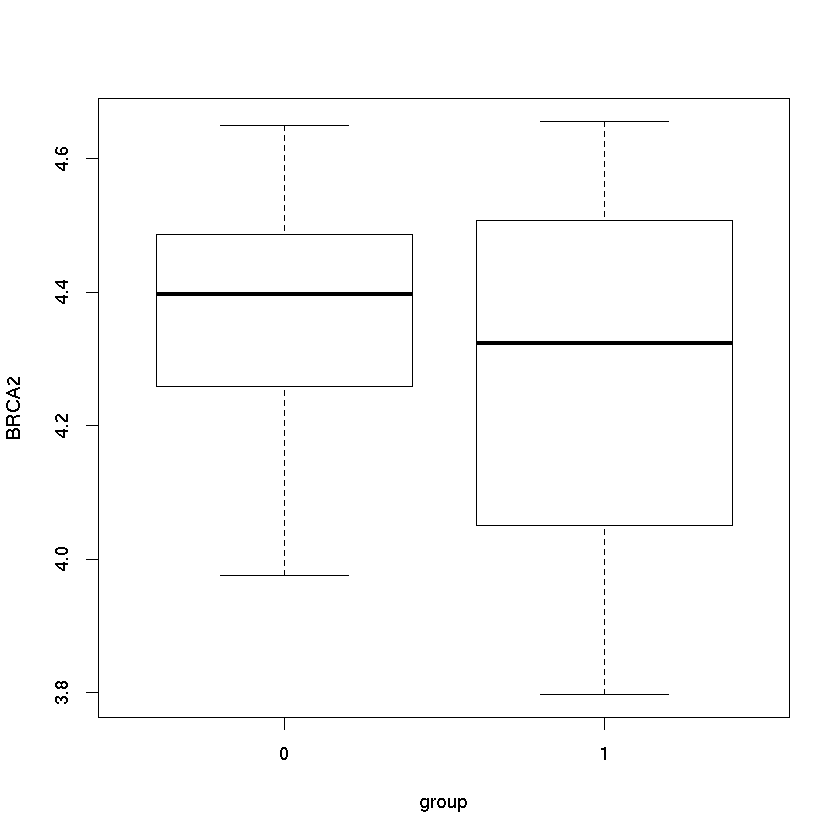

In [24]:
twoSamplePlot = function(es, stratvar, symbol, selected=1) {
    # selected parameter needed for genes that have multiple probes
    boxplot(split(exprs(es[which(fData(es)$SYMBOL==symbol)[selected],]), 
                  es[[stratvar]]),xlab=stratvar, ylab=symbol)
}
twoSamplePlot(es5859, stratvar="group", symbol="BRCA2")

#### Adding some metadata on publication origins

The annotate package includes a function that retrieves information about the paper associated with
an experiment.

In [25]:
library(annotate)
mi = pmid2MIAME("17206142")
experimentData(es5859) = mi
es5859

Loading required package: XML


ExpressionSet (storageMode: lockedEnvironment)
assayData: 8793 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM136508.CEL.gz GSM136530.CEL.gz ... GSM136572.CEL.gz
    (24 total)
  varLabels: ethnicity date filename group
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-r2-P1-cre-5_at (8793 total)
  fvarLabels: PROBEID CHR CHRLOC SYMBOL
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 17206142 
Annotation:  

We have now bound the textual abstract of the associated paper into the ExpressionSet.

In [26]:
abstract(es5859)

[1] "Variation in DNA sequence contributes to individual differences in quantitative traits, but in humans the specific sequence variants are known for very few traits. We characterized variation in gene expression in cells from individuals belonging to three major population groups. This quantitative phenotype differs significantly between European-derived and Asian-derived populations for 1,097 of 4,197 genes tested. For the phenotypes with the strongest evidence of cis determinants, most of the variation is due to allele frequency differences at cis-linked regulators. The results show that specific genetic variation among populations contributes appreciably to differences in gene expression phenotypes. Populations differ in prevalence of many complex genetic diseases, such as diabetes and cardiovascular disease. As some of these are probably influenced by the level of gene expression, our results suggest that allele frequency differences at regulatory polymorphisms also account for some population differences in prevalence of complex diseases."

### Working with NCBI GEO to retrieve experiments of interest

Now that we have a unified representation of collections of microarrays, we can use it to manage
information retrieved from GEO.  The GEOquery package makes it very easy to obtain series of
microarray experiments.

There are results of tens of thousands of experiments in GEO. The GEOmetadb includes tools to acquire and query a SQLite database with extensive annotation of GEO contents. The database retrieved in October 2017 was over 6 GB in size. Thus we do not require that you use this package. If you are interested, the vignette is very thorough.

We used GEOmetadb to find the name (GSE accession number) of an experiment that studied the effects of applying a compound to
cells derived from glioblastoma tumors.

__N.B.: The following code takes a while to run -- maybe two minutes ...__

In [27]:
library(GEOquery)
glioMA = getGEO("GSE78703")[[1]]

# Local mirror of file in case of connection problems
#glioMA <- getGEO(filename = "/home/ubuntu/glioma/GSE78703_series_matrix.txt.gz")

Found 1 file(s)
GSE78703_series_matrix.txt.gz
Parsed with column specification:
cols(
  ID_REF = col_character(),
  GSM2072905 = col_double(),
  GSM2072906 = col_double(),
  GSM2072907 = col_double(),
  GSM2072908 = col_double(),
  GSM2072909 = col_double(),
  GSM2072910 = col_double(),
  GSM2072911 = col_double(),
  GSM2072912 = col_double(),
  GSM2072913 = col_double(),
  GSM2072914 = col_double(),
  GSM2072915 = col_double(),
  GSM2072916 = col_double()
)
File stored at: 
/tmp/Rtmpd2HSNg/GPL15207.soft


In [28]:
glioMA

ExpressionSet (storageMode: lockedEnvironment)
assayData: 49395 features, 12 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM2072905 GSM2072906 ... GSM2072916 (12 total)
  varLabels: title geo_accession ... treated with:ch1 (35 total)
  varMetadata: labelDescription
featureData
  featureNames: 11715100_at 11715101_s_at ... AFFX-TrpnX-M_at (49395
    total)
  fvarLabels: ID GeneChip Array ... SPOT_ID (24 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
Annotation: GPL15207 

This object responds to all the methods we've already used.  For example:

In [29]:
head(fData(glioMA))

,ID,GeneChip Array,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Transcript ID(Array Design),Target Description,GB_ACC,GI,⋯,Gene Symbol,Chromosomal Location,Unigene Cluster Type,Ensembl,Entrez Gene,SwissProt,OMIM,RefSeq Protein ID,RefSeq Transcript ID,SPOT_ID
11715100_at,11715100_at,Human Genome PrimeView Array,Homo sapiens,40780,Consensus sequence,Affymetrix Proprietary Database,g21264570,g21264570 /TID=g21264570 /CNT=1 /FEA=FLmRNA /TIER=FL /STK=0 /DEF=g21264570 /REP_ORG=Homo sapiens,,21264570,⋯,HIST1H3G,chr6p21.3,full length,ENSG00000248541,8355,P68431,602815,NP_003525,NM_003534,
11715101_s_at,11715101_s_at,Human Genome PrimeView Array,Homo sapiens,40780,Consensus sequence,Affymetrix Proprietary Database,g21264570,g21264570 /TID=g21264570 /CNT=1 /FEA=FLmRNA /TIER=FL /STK=0 /DEF=g21264570 /REP_ORG=Homo sapiens,,21264570,⋯,HIST1H3G,chr6p21.3,full length,ENSG00000248541,8355,P68431,602815,NP_003525,NM_003534,
11715102_x_at,11715102_x_at,Human Genome PrimeView Array,Homo sapiens,40780,Consensus sequence,Affymetrix Proprietary Database,g21264570,g21264570 /TID=g21264570 /CNT=1 /FEA=FLmRNA /TIER=FL /STK=0 /DEF=g21264570 /REP_ORG=Homo sapiens,,21264570,⋯,HIST1H3G,chr6p21.3,full length,ENSG00000248541,8355,P68431,602815,NP_003525,NM_003534,
11715103_x_at,11715103_x_at,Human Genome PrimeView Array,Homo sapiens,40780,Consensus sequence,Affymetrix Proprietary Database,g22748780,g22748780 /TID=g22748780 /CNT=1 /FEA=FLmRNA /TIER=FL /STK=0 /DEF=g22748780 /REP_ORG=Homo sapiens,,22748780,⋯,TNFAIP8L1,chr19p13.3,full length,ENSG00000185361,126282,Q8WVP5,---,NP_001161414 /// NP_689575,NM_001167942 /// NM_152362,
11715104_s_at,11715104_s_at,Human Genome PrimeView Array,Homo sapiens,40780,Consensus sequence,Affymetrix Proprietary Database,g30039713,g30039713 /TID=g30039713 /CNT=1 /FEA=FLmRNA /TIER=FL /STK=0 /DEF=g30039713 /REP_ORG=Homo sapiens,,30039713,⋯,OTOP2,chr17q25.1,full length,ENSG00000183034,92736,Q7RTS6,607827,NP_835454,NM_178160,
11715105_at,11715105_at,Human Genome PrimeView Array,Homo sapiens,40780,Consensus sequence,Affymetrix Proprietary Database,g45580703,g45580703 /TID=g45580703 /CNT=1 /FEA=FLmRNA /TIER=FL /STK=0 /DEF=g45580703 /REP_ORG=Homo sapiens,,45580703,⋯,C17orf78,chr17q12,full length,ENSG00000167230,284099,Q8N4C9,---,NP_775896,NM_173625,


In [30]:
head(pData(glioMA))

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,cell type:ch1,treated with:ch1
GSM2072905,NHA DMSO 1,GSM2072905,Public on Sep 08 2017,Feb 26 2016,Sep 08 2017,RNA,1,Normal human astrocytes_DMSO control,Homo sapiens,cell type: Normal human astrocytes,⋯,David Geffen School of Medicine at UCLA,9500 Gilman Drive,La Jolla,CA,92093-0753,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2072nnn/GSM2072905/suppl/GSM2072905_14692.Mischel.NHA1.sh_PrimeView_.CEL.gz,49395,Normal human astrocytes,DMSO control
GSM2072906,NHA DMSO 2,GSM2072906,Public on Sep 08 2017,Feb 26 2016,Sep 08 2017,RNA,1,Normal human astrocytes_DMSO control,Homo sapiens,cell type: Normal human astrocytes,⋯,David Geffen School of Medicine at UCLA,9500 Gilman Drive,La Jolla,CA,92093-0753,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2072nnn/GSM2072906/suppl/GSM2072906_14693.Mischel.NHA2.sh_PrimeView_.CEL.gz,49395,Normal human astrocytes,DMSO control
GSM2072907,NHA DMSO 3,GSM2072907,Public on Sep 08 2017,Feb 26 2016,Sep 08 2017,RNA,1,Normal human astrocytes_DMSO control,Homo sapiens,cell type: Normal human astrocytes,⋯,David Geffen School of Medicine at UCLA,9500 Gilman Drive,La Jolla,CA,92093-0753,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2072nnn/GSM2072907/suppl/GSM2072907_14694.Mischel.NHA3.sh_PrimeView_.CEL.gz,49395,Normal human astrocytes,DMSO control
GSM2072908,U87vIII DMSO 1,GSM2072908,Public on Sep 08 2017,Feb 26 2016,Sep 08 2017,RNA,1,U87EGFRvIII glioblastoma cells_DMSO control,Homo sapiens,cell type: U87EGFRvIII glioblastoma cells,⋯,David Geffen School of Medicine at UCLA,9500 Gilman Drive,La Jolla,CA,92093-0753,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2072nnn/GSM2072908/suppl/GSM2072908_14695.Mischel.U87vIII1.sh_PrimeView_.CEL.gz,49395,U87EGFRvIII glioblastoma cells,DMSO control
GSM2072909,U87vIII DMSO 2,GSM2072909,Public on Sep 08 2017,Feb 26 2016,Sep 08 2017,RNA,1,U87EGFRvIII glioblastoma cells_DMSO control,Homo sapiens,cell type: U87EGFRvIII glioblastoma cells,⋯,David Geffen School of Medicine at UCLA,9500 Gilman Drive,La Jolla,CA,92093-0753,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2072nnn/GSM2072909/suppl/GSM2072909_14696.Mischel.U87vIII2.sh_PrimeView_.CEL.gz,49395,U87EGFRvIII glioblastoma cells,DMSO control
GSM2072910,U87vIII DMSO 3,GSM2072910,Public on Sep 08 2017,Feb 26 2016,Sep 08 2017,RNA,1,U87EGFRvIII glioblastoma cells_DMSO control,Homo sapiens,cell type: U87EGFRvIII glioblastoma cells,⋯,David Geffen School of Medicine at UCLA,9500 Gilman Drive,La Jolla,CA,92093-0753,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2072nnn/GSM2072910/suppl/GSM2072910_14697.Mischel.U87vIII3.sh_PrimeView_.CEL.gz,49395,U87EGFRvIII glioblastoma cells,DMSO control


In [31]:
table(glioMA$`treated with:ch1`)


           DMSO control  LXR-623 5 uM for 24 hr 
                      6                       6 

Now we can use our plotting function again -- with one caveat.  The fields of `fData` are different between
the two ExpressionSets.  We can update our new one fairly easily:

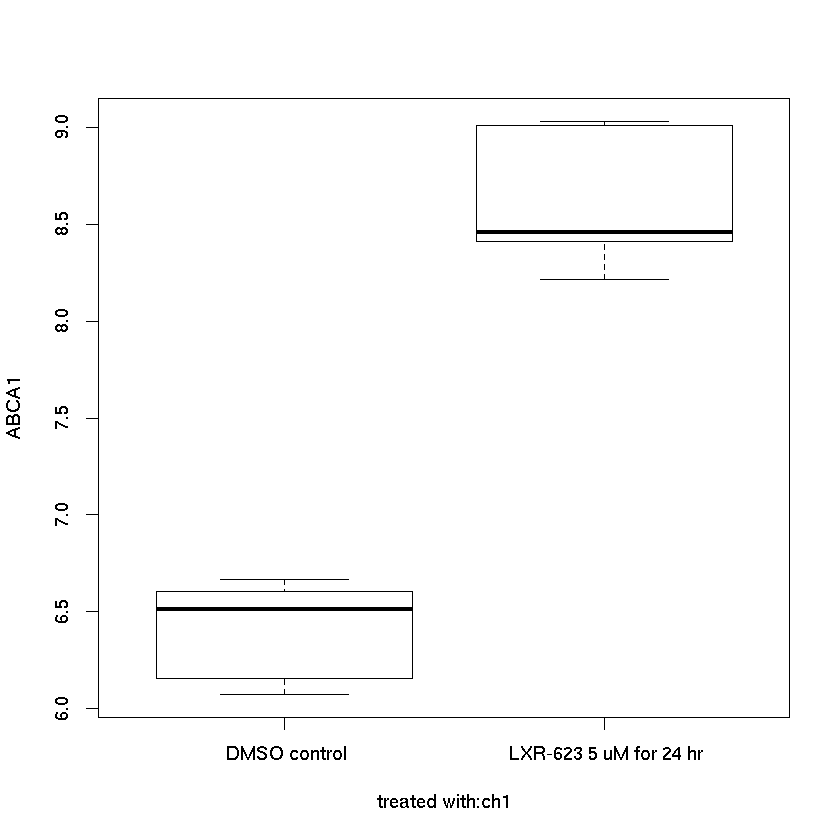

In [32]:
fData(glioMA)$SYMBOL = fData(glioMA)$"Gene Symbol" # our function assumes existence of SYMBOL in fData
twoSamplePlot(glioMA, stratvar="treated with:ch1", symbol="ABCA1") # flawed see below

### Exercise

Our plot does not fully respect the design of the glioblastoma experiment.  There are normal
and glioblastoma-derived cells.

In [33]:
library(knitr)
(kable(table(glioMA$`characteristics_ch1`, glioMA$`treated with:ch1`)))



|                                          |  DMSO control|  LXR-623 5 uM for 24 hr|
|:-----------------------------------------|-------------:|-----------------------:|
|cell type: Normal human astrocytes        |             3|                       3|
|cell type: U87EGFRvIII glioblastoma cells |             3|                       3|

Use twoSamplePlot to compare only the normal astrocytes with respect to expression of ABCA1.

In [34]:
#twoSamplePlot(glioMA[, ...], stratvar="treated with:ch1", symbol="ABCA1")

### Summary

- ExpressionSets unify sample-level data with molecular assays
- exprs(), fData(), pData() and associated shortcuts extract key components
- GEOquery retrieves ExpressionSets from GEO
- GEOmetadb indexes GEO and helps you find experiments for retrieval
- *SummarizedExperiment* and *RangedSummarizedExperiment* are more modern alternatives to *ExpressionSet*, and have different methods